In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,2
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,3
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,4


In [6]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [7]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [9]:
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

SVR()

In [10]:
svm1_pred = svm1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=svm1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,5499.230471
54,31100.000000,5499.965637
185,13300.000000,5499.965744
80,20000.000000,5500.013618
33,600.000000,5499.942174
201,7400.000000,5499.336088
37,1400.000000,5500.007734
218,4800.000000,5499.768415
199,1000.000000,5499.949278
66,22000.000000,5500.010723


In [29]:
print('SVM Performance:')

print('\nall features, No scaling:')
accuracy=svm1.score(X_test,y_test)
train=svm1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["svr perfromance",*evaluate(y_test, svm1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

SVM Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,svr perfromance,7075.850209,9.645614e+07,9821.208504,-0.181554,-0.174582,-0.181554


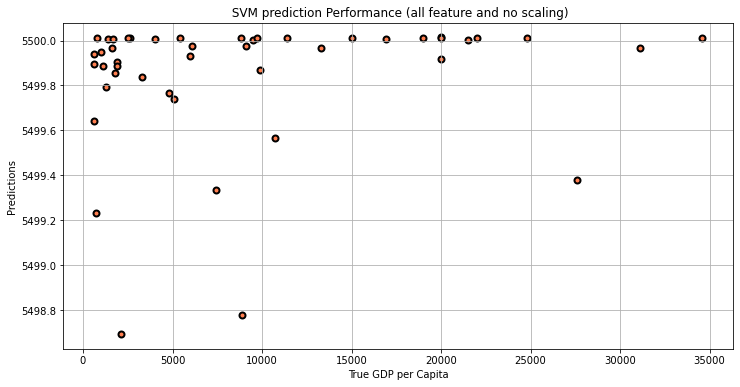

In [30]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,svm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title(' SVM prediction Performance (all feature and no scaling)') 
plt.grid()
plt.show()

In [12]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [13]:
svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

SVR()

In [14]:
svm2_pred = svm2.predict(X2_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=svm2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,5491.759675
54,31100.000000,5522.880892
185,13300.000000,5518.819770
80,20000.000000,5513.523325
33,600.000000,5494.680543
201,7400.000000,5510.941457
37,1400.000000,5505.973274
218,4800.000000,5514.232094
199,1000.000000,5504.356054
66,22000.000000,5518.570224


In [31]:
print('SVM Performance:')
print('\nall features, with scaling:')
accuracy=svm2.score(X2_test,y2_test)
train=svm2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["svr perfromance",*evaluate(y2_test, svm2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

SVM Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,svr perfromance,7068.482895,9.624463e+07,9810.434613,-0.178963,-0.172275,-0.178963


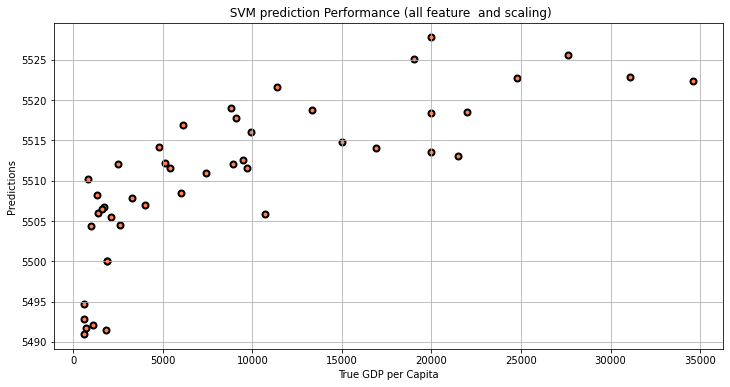

In [16]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,svm2_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title(' SVM prediction Performance (all feature  and scaling)') 
plt.grid()
plt.show()

In [17]:
y3 = y
X3 = GDP1.drop(["Pop. Density (per sq. mi.)",'GDP ($ per capita)', 'Arable (%)',
                        'Climate', 'Deathrate',"Industry","Service" ], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [18]:
svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

SVR()

In [19]:
svm3_pred = svm3.predict(X3_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=svm3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,5499.230190
54,31100.000000,5499.965619
185,13300.000000,5499.965726
80,20000.000000,5500.013625
33,600.000000,5499.942144
201,7400.000000,5499.335825
37,1400.000000,5500.007739
218,4800.000000,5499.768300
199,1000.000000,5499.949251
66,22000.000000,5500.010730


In [26]:
print('SVM Performance:')
print('\slected features, No scaling:')
accuracy=svm3.score(X3_test,y3_test)
train=svm3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["svr perfromance",*evaluate(y_test, svm3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

SVM Performance:
\slected features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,svr perfromance,7075.850201,9.645614e+07,9821.208512,-0.181554,-0.174582,-0.181554


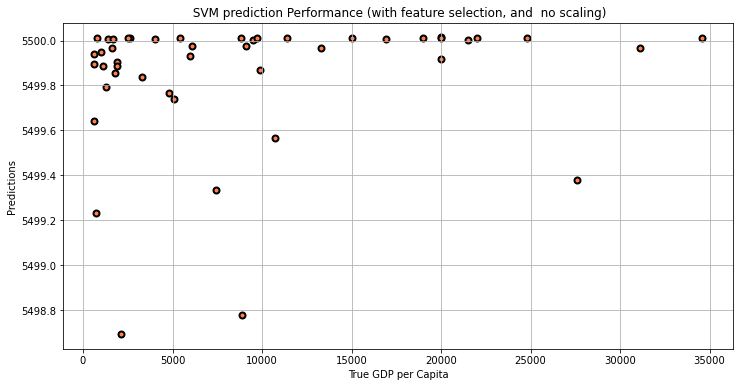

In [21]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title(' SVM prediction Performance (with feature selection, and  no scaling)') 
plt.grid()
plt.show()

In [22]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [23]:
svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

SVR()

In [24]:
svm4_pred = svm4.predict(X4_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=svm4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,5493.624481
54,31100.000000,5533.040168
185,13300.000000,5522.296389
80,20000.000000,5516.856837
33,600.000000,5494.398536
201,7400.000000,5515.231338
37,1400.000000,5506.134406
218,4800.000000,5518.488679
199,1000.000000,5507.710019
66,22000.000000,5527.024731


In [27]:
print('SVM Performance:')
print('selected features, with scaling:')
accuracy=svm4.score(X4_test,y4_test)
train=svm4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["svr perfromance",*evaluate(y_test,svm4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

SVM Performance:
selected features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,svr perfromance,7066.825773,9.617592e+07,9806.931991,-0.178122,-0.171677,-0.178122


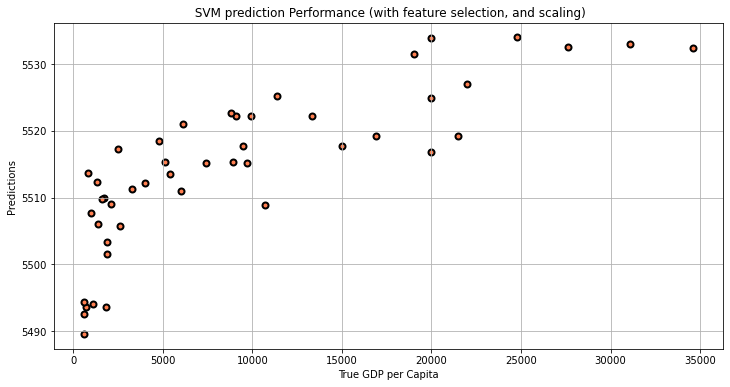

In [28]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,svm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title(' SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()